<a href="https://colab.research.google.com/github/Shashikant29-Jituri/Shashikant/blob/main/mileage_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mileage Prediction - Regression Analysis**

# **Objective**

1.Collect and preprocess vehicle data.

2.Select relevant features that affect mileage.

3.Choose and train an appropriate regression model.

4.Evaluate the model's accuracy and performance.

5.Analyze feature importance for insights.

6.Deploy the model for real-world mileage prediction.

7.Continuously update and improve the model.



# **Data Source**

This dataset was taken from the github library which is maintained at YBI Foundation

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# **Import Data**

In [5]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

In [6]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Describe Data**

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [10]:
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# **Data Visualization**

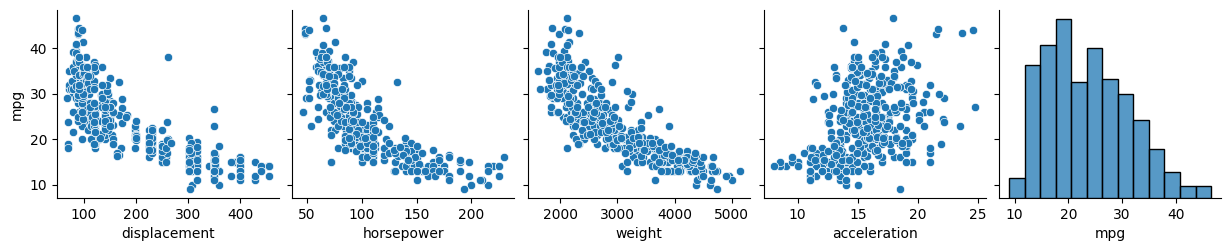

In [12]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg']);

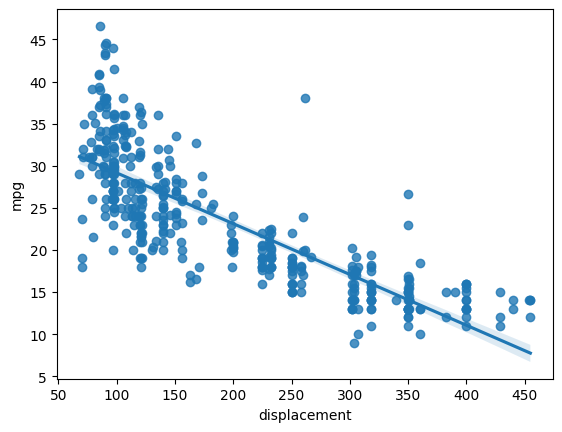

In [13]:
sns.regplot(x='displacement', y='mpg', data=df);

# **Data Preprocessing**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# **Define Target Variable (y) and Feature Variables (X)**

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y=df['mpg']

In [17]:
y.shape

(398,)

In [18]:
X=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [19]:
X.shape

(398, 4)

In [20]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()

In [23]:
X=ss.fit_transform(X)

In [24]:
X

array([[ 1.0906037 ,  0.66413273,  0.63086987, -1.29549834],
       [ 1.5035143 ,  1.57459447,  0.85433297, -1.47703779],
       [ 1.19623199,  1.18439658,  0.55047045, -1.65857724],
       ...,
       [-0.56103873, -0.53247413, -0.79858454, -1.4407299 ],
       [-0.70507731, -0.66254009, -0.40841088,  1.10082237],
       [-0.71467988, -0.58450051, -0.29608816,  1.39128549]])

In [25]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.980000e+02,3.920000e+02,3.980000e+02,3.980000e+02
mean,-1.785283e-17,-1.812609e-16,-1.606755e-16,-2.677925e-16
std,1.001259e+00,1.001278e+00,1.001259e+00,1.001259e+00
min,-1.204411e+00,-1.520975e+00,-1.604943e+00,-2.747814e+00
25%,-8.563178e-01,-7.665929e-01,-8.828266e-01,-6.328794e-01
50%,-4.314040e-01,-2.853488e-01,-1.973624e-01,-2.472221e-02
75%,6.584879e-01,5.600800e-01,7.538337e-01,5.834349e-01
max,2.511784e+00,3.265452e+00,2.565185e+00,3.351912e+00


# **Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=2529)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 4), (120, 4), (278,), (120,))

# **Modeling**

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [41]:
imputer.fit(X_train)

SimpleImputer()

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
imputer = SimpleImputer(strategy='mean')

In [48]:
X_train_imputed = imputer.fit_transform(X_train)

In [65]:
lr.fit(X_train_imputed, y_train)

LinearRegression()

In [56]:
X_test_imputed = imputer.transform(X_test)

In [57]:
lr.intercept_

23.519120095963945

In [58]:
lr.coef_

array([-1.12507741, -1.15124735, -4.59186042, -0.14891162])

# **Prediction**

In [59]:
y_pred = lr.predict(X_test_imputed)

In [60]:
y_pred

array([15.67378741, 30.8361708 , 18.85357794, 24.04807007, 32.44419487,
       29.72937907, 25.20157821, 12.48283563,  9.07205718, 28.83510914,
       30.77859591, 20.8415169 , 31.79392973, 14.71768165, 20.52134458,
       15.18614778, 24.50307035, 32.04376221, 14.59888109, 11.43258835,
       18.529031  , 30.34754635, 27.11526098, 18.82357381, 20.27463577,
       26.08947943, 32.20963996, 30.40702938,  9.48748814, 25.55747046,
        8.21191244, 26.89824117, 31.00863202, 21.08064261, 16.75713416,
       21.02014552,  9.9508422 , 23.52274551, 31.03947082, 33.48292116,
       26.05031371, 31.22337975, 27.63966894, 18.65502749, 22.14677791,
       24.56462927, 20.62182464, 29.6917901 , 23.51921325, 24.57641089,
       27.75909015, 12.71997549, 22.81340945, 32.60831186, 19.04574187,
       14.07281228, 31.00565428, 26.78501853, 21.09867947, 29.99705575,
       23.42934821, 30.98185245, 23.04190654,  8.65443776, 31.4803226 ,
       19.71357361, 27.65278317, 21.38088335, 11.28623187, 28.62

# **Model Evaluation**

In [61]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [62]:
mean_absolute_error(y_test,y_pred)

3.527894281492295

In [63]:
mean_absolute_percentage_error(y_test,y_pred)

0.15742495012171218

In [64]:
r2_score(y_test,y_pred)

0.6671431092864399

# **Explaination**

"Mileage prediction" using a Machine Learning (ML) model involves building a system to estimate the fuel efficiency (miles per gallon - mpg) of a vehicle based on its various attributes. The goal is to create a predictive model that can accurately forecast the vehicle's mileage, which can be valuable for consumers, manufacturers, and policymakers alike.

Attributes:

1.mpg: The target variable representing the miles per gallon, which is the value we want to predict.

2.cylinders: The number of cylinders in the vehicle's engine.

3.displacement: The engine displacement, which indicates the total volume of all the cylinders in the engine.

4.horsepower: The horsepower of the vehicle, which is a measure of its engine power.

5.weight: The weight of the vehicle, which affects its energy consumption.

6.acceleration: The acceleration performance of the vehicle.

7.model_year: The year when the vehicle was manufactured.

8.origin: The region where the vehicle was produced (e.g., North America, Europe, Asia).

9.name: The name or model of the vehicle.